**This notebook contains a class that uses numpy to build a simplest of NN and we the networks performance on MNIST dataset.**

In [131]:
#Importing requires libraries
import numpy as np
import pandas as pd
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

#Neural Network Class

In [102]:
class neuralNetwork():

  def __init__(self, num_input_node, num_hidden_node, num_output_node, learning_rate):
    self.input_nodes = num_input_node
    self.hidden_nodes = num_hidden_node
    self.output_nodes = num_output_node
    self.learning_rate = learning_rate

    #Initializing weights
    self.wgt_ih = np.random.normal(0.0, pow(self.hidden_nodes, -0.5), (self.hidden_nodes, self.input_nodes)) 
    self.wgt_ho = np.random.normal(0.0, pow(self.output_nodes, -0.5),(self.output_nodes, self.hidden_nodes)) 

    #Activation function definition
    self.activation_function = lambda x: scipy.special.expit(x)

  #Method used for training the model
  def train(self, input_list, target_list):
    
    input = np.array(input_list, ndmin = 2).T
    target = np.array(target_list, ndmin = 2).T

    input_hidden_layer = np.dot(self.wgt_ih, input)
    output_hidden_layer = self.activation_function(input_hidden_layer)

    input_final_layer = np.dot(self.wgt_ho, output_hidden_layer)
    output_final_layer = self.activation_function(input_final_layer)

    #Calculating error
    output_error = target - output_final_layer
    hidden_layer_error = np.dot(self.wgt_ho.T, output_error)

    #Updating/Learning weights from the error
    self.wgt_ho += self.learning_rate * np.dot((output_error * output_final_layer * (1.0 - output_final_layer)), np.transpose(output_hidden_layer))
    self.wgt_ih += self.learning_rate * np.dot((hidden_layer_error * output_hidden_layer * (1.0 - output_hidden_layer)), np.transpose(input))

  #Query method used for prediction using test data
  def query(self, input_list):

    input = np.array(input_list, ndmin = 2).T

    input_hidden_layer = np.dot(self.wgt_ih, input)
    output_hidden_layer = self.activation_function(input_hidden_layer)

    input_final_layer = np.dot(self.wgt_ho, output_hidden_layer)
    output_final_layer = self.activation_function(input_final_layer)

    return output_final_layer

#Loading Data

data source: http://pjreddie.com/projects/mnist-in-csv/
Here we can find the MNIST data set in csv format, we can simply download the files, in this each row contains information of an image, with first column being class label and rest of the columns as image pixel.

In [6]:
train_data = pd.read_csv('/content/drive/My Drive/mnist_train.csv')
test_data = pd.read_csv('/content/drive/My Drive/mnist_test.csv')

In [7]:
train_data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
test_data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h1> Let us plot the image for 2 data points </h1>

In [17]:
img_array = train_data.iloc[0][1:].values.reshape(28, 28)

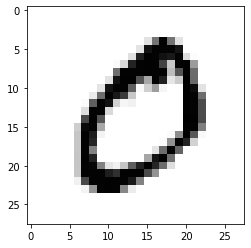

In [21]:
plt.imshow(img_array, cmap = 'Greys')

In [22]:
img_array = train_data.iloc[1][1:].values.reshape(28, 28)

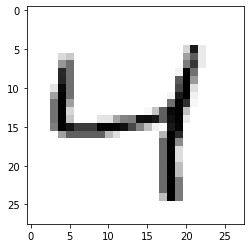

In [23]:
plt.imshow(img_array, cmap = 'Greys')

#Data Preparation

In [60]:
train_x = train_data[train_data.columns[1:]].values

In [37]:
#train_y = train_data['5'].values

In [61]:
test_x = test_data[test_data.columns[1:]].values
#test_y = test_data['7'].values

In [62]:
print('shape of train is: {}'.format(train_x.shape))
print('shape of test is: {}'.format(test_x.shape))

shape of train is: (59999, 784)
shape of test is: (9999, 784)


<h1> Scaling data </h1>

We need to rescale the input from the larger rang of 0 to 255 toa much smaller range of 0.01 to 1, rescaling to 0.01 instead of zero is chosen to make sure none of our inputs are 0, as they can artificially kill weight updates. 

<h2> input to the model </h2>

In [63]:
train_x = train_x /255.0 * .99 + 0.01

In [64]:
test_x = test_x / 255.0 * .99 + 0.01

<h2> output labels </h2>

Here we are trying to perform a classification task, with our labels being numbers between 0 and 9. So, output layer should have 10 nodes, one for each possible labels.

Now, our activation function is logistic which have values ranging from 0.0 and 1.0, also, we can't reach 0.0 and 1.0 as the logistic function only approaches these extremes without actually getting there. So, we may need to scale our target values during training as well.So, our target array would contain 10 elements. So, if we have a target of number 5, it should be [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]. Also, trying to get our NN producing outputs 0, 1 are impossible for activation function, so, we will scale it such that instead of 0 we use 0.1 and insted of 1 we use 0.99. So, for 5 this will look like: [0.1, 0.1, 0.1, 0.1, 0.1, 0.99, 0.1, 0.1, 0.1, 0.1].



In [80]:
def get_vector(value):
  vec = np.zeros(10) + 0.01
  vec[value] = 0.99
  return list(vec)

In [83]:
train_y = train_data[train_data.columns[0]].values

In [84]:
train_y = [get_vector(target) for target in train_y]

In [91]:
train_y = np.array(train_y)

In [92]:
train_y.shape

(59999, 10)

In [93]:
test_y = test_data[test_data.columns[0]].values
test_y = [get_vector(target) for target in test_y]
test_y = np.array(test_y)
test_y.shape

(9999, 10)

#Training the network

In [126]:
#Calling our neural netowrk class
input_nodes = 784
hidden_nodes = 500
output_nodes = 10
learning_rate = 0.1

nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

<h2> Training the network </h2>

Doing it for 5 epochs, their are multiple hyperparameter to consider example the learning rate, number of hidden layers, epochs, with 5 epoch, 500 hidden layers and 0.1 learning rate, got best result...

In [128]:
for epochs in range(5):
  for i in tqdm(range(train_x.shape[0])):
    nn.train(train_x[i], train_y[i])

100%|██████████| 59999/59999 [02:00<00:00, 496.81it/s]


In [129]:
correct_prediction = 0
for i in tqdm(range(test_x.shape[0])):
  prediction = np.argmax(nn.query(test_x[i]))
  if prediction == test_data[test_data.columns[0]].values[i]:
    correct_prediction += 1

100%|██████████| 9999/9999 [00:02<00:00, 3642.25it/s]


In [130]:
print('model performace is: {}'.format(correct_prediction/test_data.shape[0]))

model performace is: 0.9730973097309731


Wow the simple network did a great job if we see, model performance is pretty high, which is good. This notebook is not about creating the complex of the models, but about implementing the simplest of NN using python which indeed helped in understanding how a model actually works....